## Introducing `matplotlib`
A key part of data analysis is visualisation. Graphs can often say more about an effect in your data than any kind of reported statistic. 

Graphs can also take a lot of time to produce, setting different colours for separate variables, annotating certain sections, and saving in different formats. If you collect more data, you have to reproduce the graph. As such, graphs and figures should be reproducible objects in themselves. 

Python has a *plotting library* used to produce graphs and figures that are publication-quality through the use of Python code. 

In [1]:
# How to import matplotlib
# Access the 'pyplot' module of matplotlib, and import it with convention as `plt`
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Creating a simple plot
Making a very basic plot is straightforward - pass a list or NumPy array of `x` and `y` coordinates to the `.plot` command!

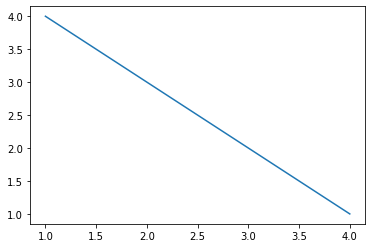

In [2]:
# Create a basic plot
plt.plot([1, 2, 3, 4], [4, 3, 2, 1])

The default setting of the `plot` function is to create a line graph. Creating the same graph, but passing a third argument string argument specifies a marker. Some popular markers include:
* '.' - a single point
* '*' - a star
* 'o' - a filled circle
* 's' - a filled square

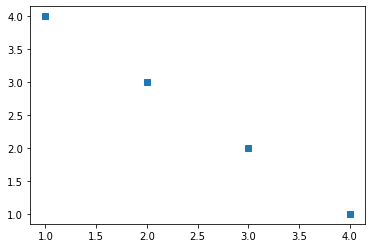

In [3]:
# Demonstrate 's'
plt.plot([1, 2, 3, 4], [4, 3, 2, 1], 's')

Colours can be changed by prefacing the marker string with a colour, and size can be altered with the `markersize` keyword being passed an integer. For example:

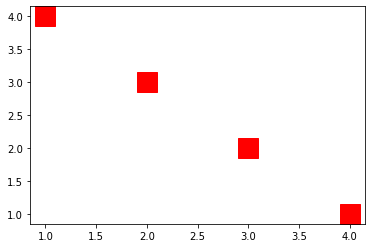

In [4]:
# Preface with a shortcut colour string - 'r' for red, and specify large points
plt.plot([1, 2, 3, 4], [4, 3, 2, 1], 'rs', markersize=20)

The full range of supported colours and markers can be found [here](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html).

#### The `figure` and `axis` objects
While creating plots is straightforward, customising them is not so simple. To fully master `Matplotlib` its important to understand a bit of how it works.

When you call `plt.plot()`, Python does a few things behind the scenes:
* It creates a `figure()` object. This can be thought of as a blank canvas - as if Python is setting up an easel and laying out paintbrushes. The `figure()` object has multiple attributes, including the ability to save the figure, set the size of the figure and display quality etc.
* It creates a single `axes()` object, which simply paints onto the created canvas a set of axes that are ready to receive data.

This automaticity is great for quick plotting, but, for historical reasons, makes editing plots unusual and not very *Pythonic*.

If you are going to create a plot and want full control (you do) then we can manually create a canvas and an axis, using the `.figure()` and `.axes()` functions.

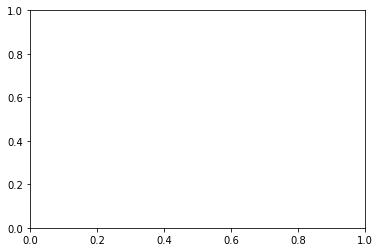

In [5]:
# Create empty figure, and add onto it an axis - Python will behind the scenes add the axes to the existing figure
fig = plt.figure()
ax = plt.axes()

With our empty graph ready, we can now plot data. To do this, we use the plotting commands of the `axis` object - remember, the axis is the thing that plots, and the figure is the canvas!

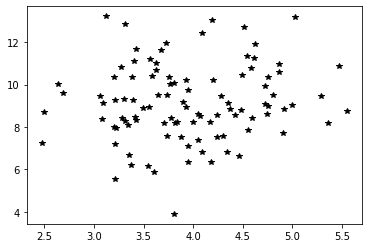

In [6]:
# A simple scatter with generated data
X = np.random.normal(loc=4, scale=0.75, size=(100,1))
Y = np.random.normal(loc=9, scale=1.75, size=(100,1))

# Use ax to plot!
ax.plot(X, Y, 'k*')

# Now look at the figure, which has all the visualisation
fig

### Customising figures
We have infinite flexibility in our creation of figures. Some common examples we want to use:
* We can specify larger figures using the `figsize` argument in our call to `.figure()`.
* The `.figsave()` method allows us to specify a filename and write out our plots to file.
* We can specify axis labels using `.set_ylabel()`, `.set_xlabel()`, and titles via `.set_title()`, all methods of an Axes object.
* Turn off certain axis lines. Each axis object has `spines` dictionary that contains a reference to the actual axis lines that have been drawn on the graph. Each has a `.set_visible()` attribute that we can set to True or False!

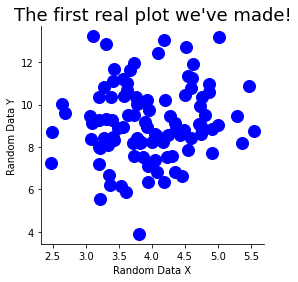

In [7]:
# Create new figure window and axis
new_fig = plt.figure(figsize=(4, 4))
ax2 = plt.axes()

# Plot this with blue circles and size 12 markers
ax2.plot(X, Y, 'bo', markersize=12)

# Edit some aspects
ax2.set_xlabel('Random Data X')
ax2.set_ylabel('Random Data Y')
ax2.set_title("The first real plot we've made!", fontsize=18)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Save
new_fig.savefig('Test_plot.jpg')

### Subplots 
A figure is capable of drawing multiple axes onto it, allowing for rich and complex data visualisations. These can be set up through the `plt.subplots()` command. This function returns at least two variables. 
* The first is a figure - the canvas on which all axes are drawn.
* The second will be a NumPy array that contains separate axes that you can draw on.

The `.subplots()` function allows you to set up an *array* of plots that are drawn onto a figure, and you can specify the shape of the arrayin the call to `.subplots()`. For example, let's make a figure with *four* axes, laid out in a 2 row, 2 column grid.

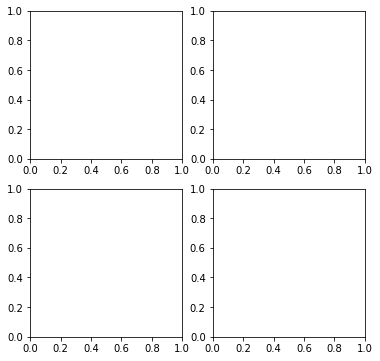

In [8]:
# Call subplots
sub_fig, axes = plt.subplots(2, 2, figsize=(6, 6))

The `axes` variable is an array of shape (2, 2), and each element is an axis that can be drawn on. An illustration of their referencing is below.

In [9]:
for index, ax in np.ndenumerate(axes):
    ax.text(0.3, 0.5, 'Axis position:\n    {}'.format(index))

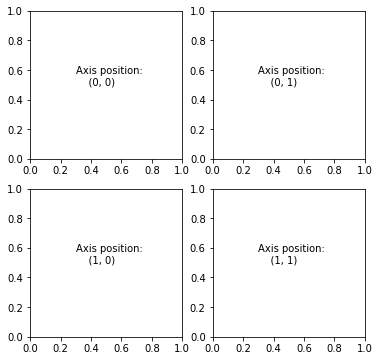

In [10]:
# Demonstrate axis positioning
sub_fig

Plotting on these axes is as simple as accessing a NumPy array.

With our different axes, we can generate a few plots that we might use frequently with data in psychology. We will use the `tips` dataset, which can be found [here](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv).

In [11]:
# Load data
tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
display(tips.head())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0.5, 1.0, 'Relationship between Tip and Total Bill\nfor Female and Male diners')

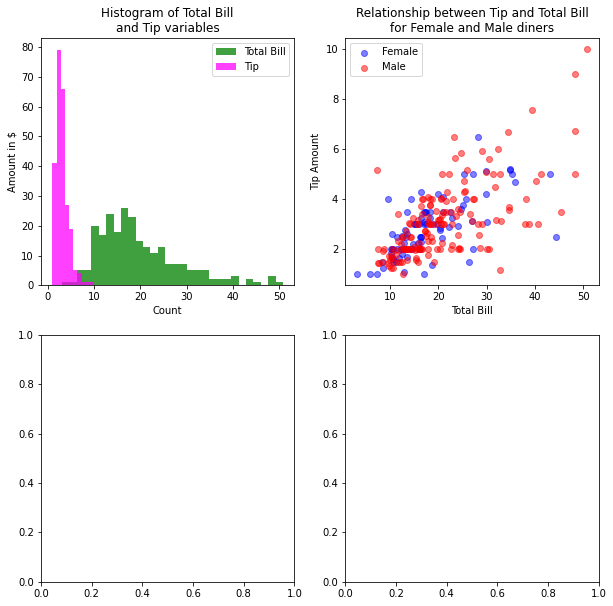

In [12]:
# Recreate axes - notice how unpacking works
tips_fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

# Put histograms in top left
ax1.hist(tips['total_bill'], bins=30, color='green', alpha=0.75, label='Total Bill')
ax1.hist(tips['tip'], bins=10, color='magenta', alpha=0.75, label='Tip')
ax1.legend()
ax1.set_ylabel('Amount in $')
ax1.set_xlabel('Count')
ax1.set_title('Histogram of Total Bill\nand Tip variables')

# Put a scatter plot in top right, exploring the sex of data with shape and colour
for sex, df in tips.groupby(by='sex'):
    
    # Check sex, replace with colour
    if sex == 'Female':
        c = 'blue'
    elif sex == 'Male':
        c = 'red'
    
    # Plot each subset on the same axis
    ax2.scatter(df['total_bill'], df['tip'], c=c, alpha=0.5, label=sex)
    
ax2.legend()
ax2.set_ylabel('Tip Amount')
ax2.set_xlabel('Total Bill')
ax2.set_title('Relationship between Tip and Total Bill\nfor Female and Male diners')

All that code and still only halfway there!

In [13]:
# Put a bar graph in the bottom left
# Compute means of tip by time/sex - as_index is like reset_index
means = tips.groupby(by=['day'], as_index=False).agg({'tip':['mean', 'std']})

ax3.bar(means['day'], means['tip']['mean'], yerr=means['tip']['std'])
ax3.set_ylabel('Tip Amount')
ax3.set_xlabel('Day')
ax3.set_title('Mean tip amount across days')

# Put a boxplot in the bottom right
data_to_plot = {}
for size, df in tips.groupby(by='sex'):
    
    data_to_plot[size] = df['total_bill']

bplot = ax4.boxplot(data_to_plot.values(), labels=list(data_to_plot.keys()))

# Change colour of each box
for box in bplot['boxes']:
    box.set(color='blue')

ax4.set_xlabel('Sex')
ax4.set_ylabel('Total Bill')
ax4.set_title('Total Bill Distribution for Male and Female Customers')

# Remove outer axes
for graph in [ax1, ax2, ax3, ax4]:
    graph.spines['right'].set_visible(False)
    graph.spines['top'].set_visible(False)


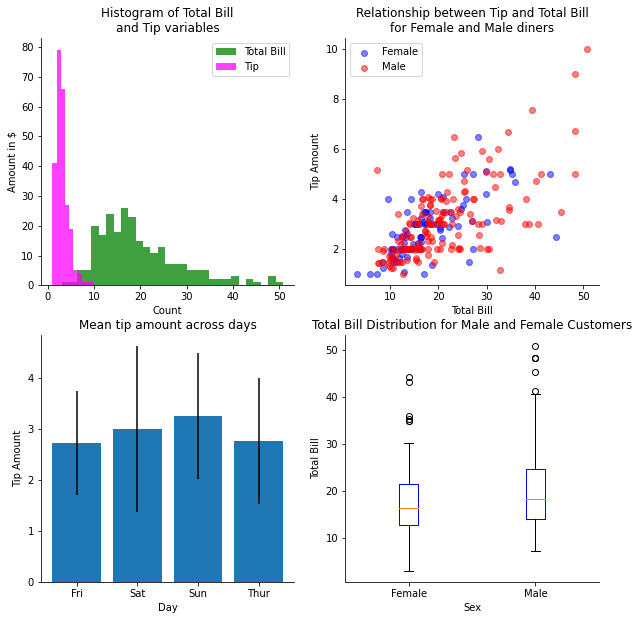

In [14]:
tips_fig

The customisation options here are very basic - there are almost an infinite number of ways to alter the appearance of your plots. As you can see, Matplotlib is a very powerful set of tools for visualising data, but it is also basic. Data has to be grouped separately and extracted from DataFrames, colours have to be linked to different groups manually, and editing certain aspects requires in-depth knowledge of the workings of the module. For most of us, this flexibility is not worth the time cost of preparing a graph in Matplotlib.

Fortunately, there is an easier way...